In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
import streamlit as st
from google.oauth2.service_account import Credentials

In [2]:
# 1. Define el scope y crea las credenciales (usando secrets si estás en Streamlit Cloud)
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive", "https://www.googleapis.com/auth/drive.file"]

In [3]:
# Arreglar clave privada si viene como string con saltos reales
key_info = dict(st.secrets["gcp_service_account"])
key_info["private_key"] = key_info["private_key"].replace("\\n", "\n") if "\\n" in key_info["private_key"] else key_info["private_key"]

In [4]:
# Desde secrets (recomendado para Streamlit Cloud)
creds = Credentials.from_service_account_info(st.secrets["gcp_service_account"], scopes=scope)

In [5]:
# 2. Autenticación y conexión al Google Sheet
client = gspread.authorize(creds)

In [6]:
# 3. Abre el Google Sheet por su nombre (también puedes usar su URL o ID)
spreadsheet = client.open("Planning_Tracker_VSP")

In [7]:
# 4. Selecciona la hoja "Transferencias"
worksheet = spreadsheet.worksheet("Eventos")

In [8]:
# 5. Convierte el contenido en DataFrame
data = worksheet.get_all_records()  # devuelve una lista de diccionarios
data_servicios_vsp = pd.DataFrame(data)

In [9]:
data_servicios_vsp

,Evento,PAX,€ PAX,Ingreso Est. €,Gasto Est. €,Margen Est. €,Factura,Cobros,Pagos,Margen (G),...,Cliente Final,Esfuerzo,Contacto,Actividad,Semana,Mes,Año,Actividad 2,Dif margen estimado vs real,Margen Real
0,Faunia-UCI-iPad Challenge-3/10/2023,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,,"2.865,9 €","0,0 €","2.865,90€",...,UCI,Normal,Melina,iPad Challenge,40,10,2023,,62%,2.8659
1,CIL-María José-Mariachi-8/10/2023,40,"18,0 €","720,0 €","630,0 €",90 €,,"0,0 €","0,0 €","0,00€",...,María José,Normal,María José,Mariachi,41,10,2023,,-100%,0.0000
2,TIQETS--Espectáculo flamenco-18/10/2023,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,,"0,0 €","0,0 €","0,00€",...,TIQETS,Normal,Teresa Broccoli,Espectáculo flamenco,42,10,2023,,-100%,0.0000
3,Kaizen-Caetano Retail-iPad Challenge-20/10/2023,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,,"4.311,0 €","0,0 €","4.311,00€",...,Caetano Retail,Normal,Luis López,iPad Challenge,42,10,2023,,74%,4.3110
4,CITITRAVEL-Astellas-iPad Challenge-24/10/2023,32,"40,5 €","1.296,0 €","358,0 €",938 €,,"0,0 €","0,0 €","0,00€",...,Astellas,Normal,Carlos Rosa,iPad Challenge,43,10,2023,,-100%,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Campamento Roma ENDESA -AMEX-Endesa-2025-07-13,20,"210,0 €","4.200,0 €","3.261,5 €",939 €,,"4.200,0 €","-2.862,5 €","1.337,50€",...,Endesa,Normal,María Cristóbal,Campamento,29,7,2025,,43%,1.3375
117,Evento bolera Pfizer -AMEX-Pfizer-2025-07-22,14,"36,0 €","504,0 €","328,7 €",175 €,,"504,0 €","-266,1 €","237,90€",...,Pfizer,Poco,Eva Sánchez,Bolera,30,7,2025,,36%,23790.0000
118,iPad Challenge Alcalá -AMEX-Laboratorios Lilly...,62,"37,9 €","2.350,0 €","825,3 €",1.525 €,,"2.350,0 €","0,0 €","2.350,00€",...,Laboratorios Lilly,Normal,Laura Castro,iPad Challenge,37,9,2025,,54%,2.3500
119,iPad Challenge interactivo 400 pax -Kaizen--20...,400,"44,1 €","17.640,0 €","9.805,0 €",7.835 €,,"8.820,0 €","-720,0 €","8.100,00€",...,Clearwater,Normal,Luis López,iPad Challenge,38,9,2025,,3%,8.1000


In [10]:
data_servicios_vsp.columns = data_servicios_vsp.columns.str.lower()

In [11]:
data_servicios_vsp.columns

Index(['evento', 'pax', '€ pax', 'ingreso est. €', 'gasto est. €',
       'margen est. €', 'factura', 'cobros', 'pagos', 'margen (g)',
       'cliente vsp', 'fee amex', 'tipo actividad', 'fecha evento', 'ds',
       'lugar evento', 'cliente final', 'esfuerzo', 'contacto', 'actividad',
       'semana', 'mes', 'año', 'actividad 2', 'dif margen estimado vs real',
       'margen real'],
      dtype='object')

In [12]:
data_servicios_vsp = data_servicios_vsp[['tipo actividad', 'fecha evento', 'cliente vsp', 'cliente final', 
    'lugar evento',  'pax', '€ pax', 'ingreso est. €', 'gasto est. €',
       'margen est. €', 'cobros', 'pagos', 'margen (g)',
       'esfuerzo', 'actividad', 'mes', 'año', ]]

data_servicios_vsp

,tipo actividad,fecha evento,cliente vsp,cliente final,lugar evento,pax,€ pax,ingreso est. €,gasto est. €,margen est. €,cobros,pagos,margen (g),esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,"2.865,9 €","0,0 €","2.865,90€",Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0 €","720,0 €","630,0 €",90 €,"0,0 €","0,0 €","0,00€",Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,"0,0 €","0,0 €","0,00€",Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,"4.311,0 €","0,0 €","4.311,00€",Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5 €","1.296,0 €","358,0 €",938 €,"0,0 €","0,0 €","0,00€",Normal,iPad Challenge,10,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Evento,2025-07-13,AMEX,Endesa,Roma,20,"210,0 €","4.200,0 €","3.261,5 €",939 €,"4.200,0 €","-2.862,5 €","1.337,50€",Normal,Campamento,7,2025
117,Actividad,2025-07-22,AMEX,Pfizer,Madrid,14,"36,0 €","504,0 €","328,7 €",175 €,"504,0 €","-266,1 €","237,90€",Poco,Bolera,7,2025
118,Actividad,2025-09-08,AMEX,Laboratorios Lilly,Alcalá de Henares,62,"37,9 €","2.350,0 €","825,3 €",1.525 €,"2.350,0 €","0,0 €","2.350,00€",Normal,iPad Challenge,9,2025
119,Actividad,2025-09-19,Kaizen,Clearwater,Madrid,400,"44,1 €","17.640,0 €","9.805,0 €",7.835 €,"8.820,0 €","-720,0 €","8.100,00€",Normal,iPad Challenge,9,2025


In [ ]:
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace("€", "eur")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(".", "")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" (g)", "")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" / ", " ")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" ", "_")

In [133]:
data_servicios_vsp

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3","2.890,0","1.122,0",1.768,"2.865,9","0,0","2865,9",Normal,iPad Challenge
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0","720,0","630,0",90,"0,0","0,0",0,Normal,Mariachi
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5","4.300,0","2.580,0",1.720,"0,0","0,0",0,Normal,Espectáculo flamenco
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9","4.311,0","1.828,0",2.483,"4.311,0","0,0",4311,Normal,iPad Challenge
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5","1.296,0","358,0",938,"0,0","0,0",0,Normal,iPad Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Evento,2025-07-13,AMEX,Endesa,Roma,20,"210,0","4.200,0","3.261,5",939,"4.200,0","-2.862,5","1337,5",Normal,Campamento
117,Actividad,2025-07-22,AMEX,Pfizer,Madrid,14,"36,0","504,0","328,7",175,"504,0","-266,1","237,9",Poco,Bolera
118,Actividad,2025-09-08,AMEX,Laboratorios Lilly,Alcalá de Henares,62,"37,9","2.350,0","825,3",1.525,"2.350,0","0,0",2350,Normal,iPad Challenge
119,Actividad,2025-09-19,Kaizen,Clearwater,Madrid,400,"44,1","17.640,0","9.805,0",7.835,"8.820,0","-720,0",8100,Normal,iPad Challenge


In [126]:
# Primero, aseguramos que las fechas están en el formato adecuado
data_servicios_vsp['fecha_evento'] = pd.to_datetime(data_servicios_vsp['fecha_evento'], format='%Y-%m-%d', errors='coerce')

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/536528156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp['fecha_evento'] = pd.to_datetime(data_servicios_vsp['fecha_evento'], format='%Y-%m-%d', errors='coerce')


In [131]:
data_servicios_vsp.columns

Index(['tipo_actividad', 'fecha_evento', 'cliente_vsp', 'cliente_final',
       'lugar_evento', 'pax', 'eur_pax', 'ingreso_est_eur', 'gasto_est_eur',
       'margen_est_eur', 'cobros', 'pagos', 'margen', 'esfuerzo', 'actividad'],
      dtype='object')

In [132]:
# Eliminar el símbolo " €" y convertir los valores a tipo float
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax', 'ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace(" €", "", regex=True)

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/342014453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \


In [134]:
# Convertir las columnas a tipo string antes de aplicar el reemplazo
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].astype(str)

# Eliminar el separador de miles (el punto)
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({"\.": ""}, regex=True)

# Cambiar las comas por puntos (para convertir a formato decimal)
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({",": "."}, regex=True)

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/4243538100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/4243538100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
/var/folders/4d/43ff

In [135]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,19.3,2890.0,1122.0,1768,2865.9,0.0,2865.9,Normal,iPad Challenge
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,18.0,720.0,630.0,90,0.0,0.0,0,Normal,Mariachi
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,21.5,4300.0,2580.0,1720,0.0,0.0,0,Normal,Espectáculo flamenco
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,71.9,4311.0,1828.0,2483,4311.0,0.0,4311,Normal,iPad Challenge
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,40.5,1296.0,358.0,938,0.0,0.0,0,Normal,iPad Challenge


In [136]:
# Convertir categóricas
data_servicios_vsp["tipo_actividad"] = data_servicios_vsp["tipo_actividad"].astype("category")
data_servicios_vsp["esfuerzo"] = data_servicios_vsp["esfuerzo"].astype("category")

# Convertir numéricas
data_servicios_vsp["pax"] = pd.to_numeric(data_servicios_vsp["pax"], errors="coerce").fillna(0).astype(int)
data_servicios_vsp["eur_pax"] = pd.to_numeric(data_servicios_vsp["eur_pax"], errors="coerce")
data_servicios_vsp["ingreso_est_eur"] = pd.to_numeric(data_servicios_vsp["ingreso_est_eur"], errors="coerce")
data_servicios_vsp["gasto_est_eur"] = pd.to_numeric(data_servicios_vsp["gasto_est_eur"], errors="coerce")
data_servicios_vsp["margen_est_eur"] = pd.to_numeric(data_servicios_vsp["margen_est_eur"], errors="coerce")
data_servicios_vsp["cobros"] = pd.to_numeric(data_servicios_vsp["cobros"], errors="coerce")
data_servicios_vsp["pagos"] = pd.to_numeric(data_servicios_vsp["pagos"], errors="coerce")
data_servicios_vsp["margen"] = pd.to_numeric(data_servicios_vsp["margen"], errors="coerce")

# Verificar cambios
print(data_servicios_vsp.dtypes)


tipo_actividad           category
fecha_evento       datetime64[ns]
cliente_vsp                object
cliente_final              object
lugar_evento               object
pax                         int64
eur_pax                   float64
ingreso_est_eur           float64
gasto_est_eur             float64
margen_est_eur            float64
cobros                    float64
pagos                     float64
margen                    float64
esfuerzo                 category
actividad                  object
dtype: object


/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/4158980845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["tipo_actividad"] = data_servicios_vsp["tipo_actividad"].astype("category")
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/4158980845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["esfuerzo"] = data_servicios_vsp["esfuerzo"].astype("category")
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/4158980845.py

In [137]:
data_servicios_vsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tipo_actividad   121 non-null    category      
 1   fecha_evento     121 non-null    datetime64[ns]
 2   cliente_vsp      121 non-null    object        
 3   cliente_final    121 non-null    object        
 4   lugar_evento     121 non-null    object        
 5   pax              121 non-null    int64         
 6   eur_pax          109 non-null    float64       
 7   ingreso_est_eur  115 non-null    float64       
 8   gasto_est_eur    112 non-null    float64       
 9   margen_est_eur   115 non-null    float64       
 10  cobros           121 non-null    float64       
 11  pagos            121 non-null    float64       
 12  margen           121 non-null    float64       
 13  esfuerzo         121 non-null    category      
 14  actividad        121 non-null    object   

In [138]:
data_servicios_vsp.sample(10)

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad
58,Actividad,2024-07-07,AMEX,Endesa,Italia,19,229.2,4355.0,3752.4,603.0,4355.0,-3026.2,1328.8,Poco,Campamento
106,Evento,2025-05-07,EARMA,INORMS,,1600,11.6,18626.0,15726.0,2900.0,18626.0,-15290.2,3335.8,Mucho,Chattanooga Negralejo
95,Actividad,2025-03-18,ITB,The Bladder Cancer Company,Madrid,16,172.7,2763.0,1400.0,1363.0,2763.0,-1270.4,1492.6,Normal,iPad Challenge
60,Actividad,2024-09-10,CITITRAVEL,Generali,Alcalá de Henares,37,38.2,1413.0,362.0,1051.0,1427.5,-50.6,1376.9,Mucho,iPad Challenge
31,Actividad,2024-03-08,AMEX,Pfizer,Madrid,6,226.7,1360.0,1144.8,215.0,0.0,-375.6,-375.6,Mucho,Visita Museo + Cena
27,Evento,2024-02-06,AMEX,Banco Santander,Madrid,120,12.9,1550.0,NaN,1550.0,1550.0,-1155.0,395.0,Mucho,Ponencia
116,Evento,2025-07-13,AMEX,Endesa,Roma,20,210.0,4200.0,3261.5,939.0,4200.0,-2862.5,1337.5,Normal,Campamento
40,Actividad,2024-04-24,AMEX,Endesa,Madrid,63,176.7,11134.6,8624.8,2510.0,5592.5,-6352.7,-760.2,Normal,Tour Guiado + Comida
72,Actividad,2024-10-23,AMEX,AstraZeneca,Salamanca,14,258.2,3615.0,2342.5,1273.0,3615.0,-2074.0,1541.0,Normal,Varias Propuestas
111,Actividad,2025-06-17,AMEX,Banco Santander,Madrid,35,72.3,2530.0,1629.8,900.0,2530.0,-1564.9,965.1,Normal,Varias Propuestas


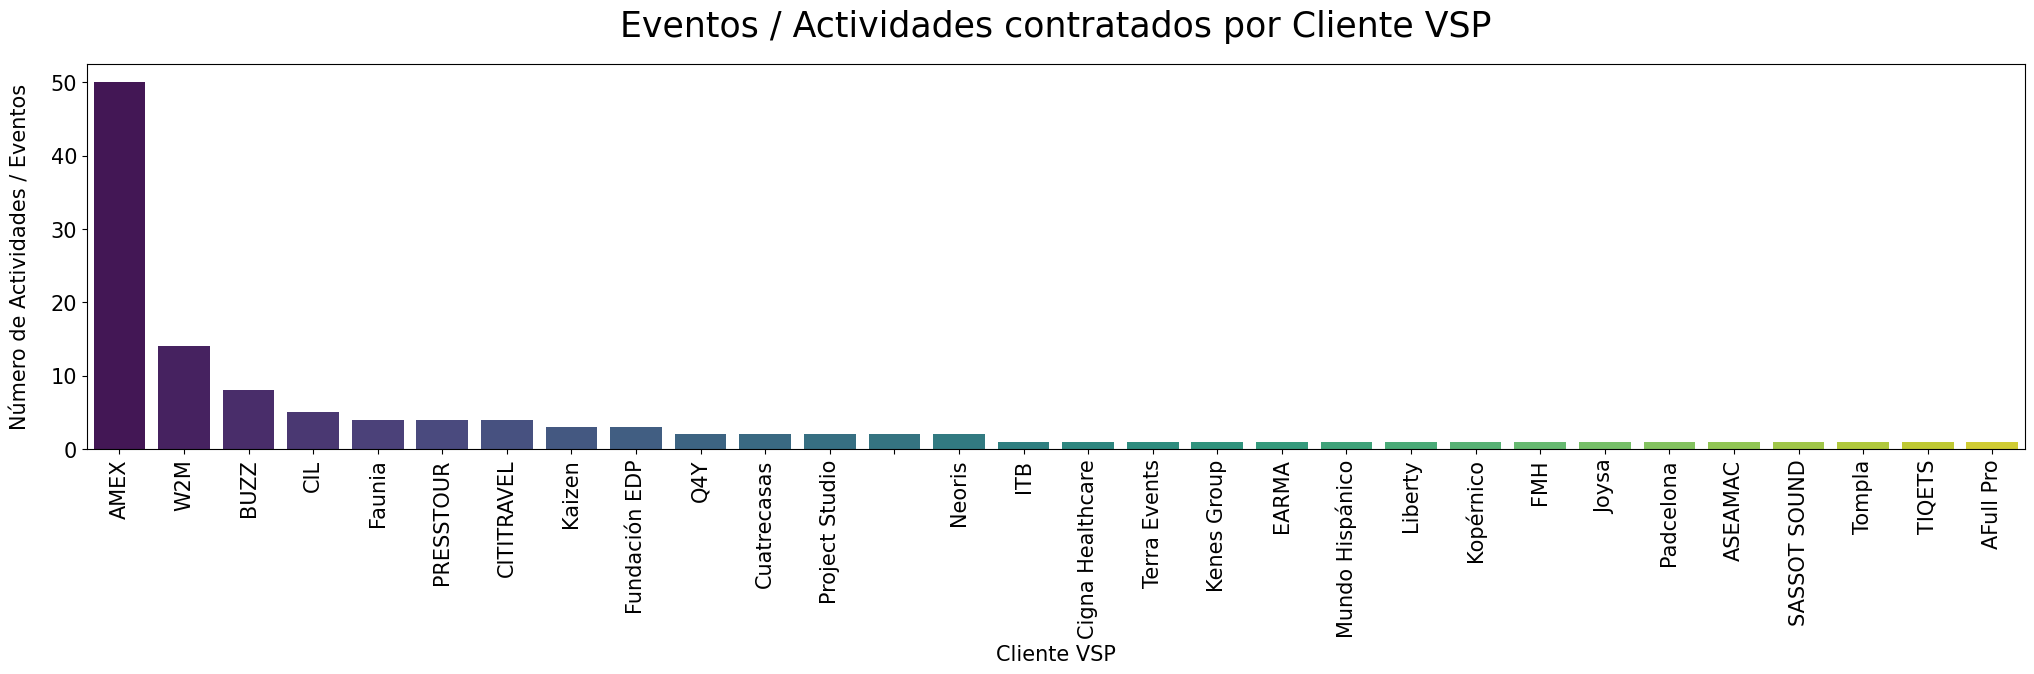

In [ ]:
# Count occurrences and sort from highest to lowest
client_counts = data_servicios_vsp["cliente_vsp"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente VSP", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente VSP", size=25, pad=20)

plt.show()


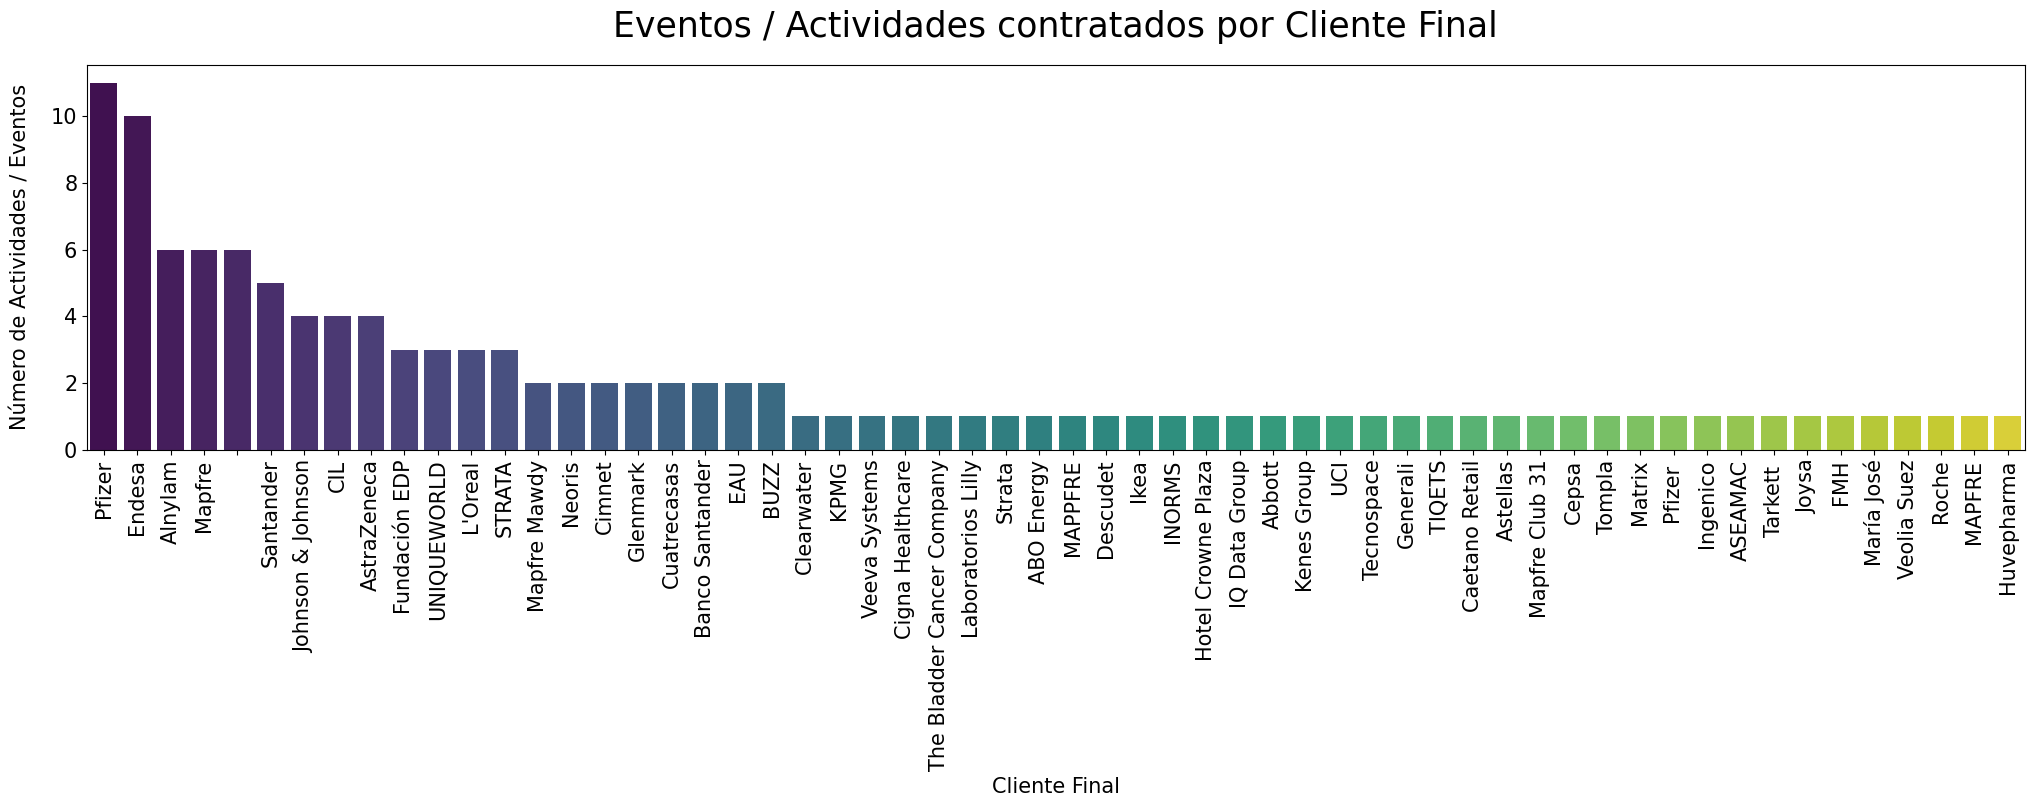

In [140]:
# Count occurrences and sort from highest to lowest
client_counts = data_servicios_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()


In [141]:
# Extraer mes y año de 'fecha_evento'
data_servicios_vsp['mes_ano'] = data_servicios_vsp['fecha_evento'].dt.to_period('M')

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/3062208462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp['mes_ano'] = data_servicios_vsp['fecha_evento'].dt.to_period('M')


In [142]:
# Agrupar por mes/año y sumar ingresos y gastos
ingresos_gastos = data_servicios_vsp.groupby('mes_ano')[['pagos', 'cobros', 'margen']].sum()

In [143]:
data_servicios_vsp["pagos"] = data_servicios_vsp["pagos"].abs()
data_servicios_vsp["gasto_est_eur"] = data_servicios_vsp["gasto_est_eur"].abs()

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/2700609183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["pagos"] = data_servicios_vsp["pagos"].abs()
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_29010/2700609183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["gasto_est_eur"] = data_servicios_vsp["gasto_est_eur"].abs()


In [144]:
ingresos_gastos

,pagos,cobros,margen
mes_ano,,,
2023-10,-323.0,7576.9,7253.9
2023-11,-4705.9,9230.2,4524.3
2023-12,-14954.0,26062.1,11108.1
2024-01,-9681.5,14728.5,5047.0
2024-02,-2713.4,5400.0,2686.6
2024-03,-12969.7,15788.3,2818.6
2024-04,-18591.3,24340.3,5749.0
2024-05,-5720.3,9425.0,3704.7
2024-06,-7680.0,11321.3,3641.3


In [145]:
ingresos_gastos.index = ingresos_gastos.index.to_timestamp()

In [146]:
# Crear un rango de meses para 2024
meses = pd.date_range('2024-01-01', '2024-12-01', freq='MS').month_name()

# Asegurarnos de que los datos tengan un índice de fechas para cada mes
ingresos_gastos['month_name'] = ingresos_gastos.index.month_name()

# Reindexar el DataFrame para incluir todos los meses de 2024
ingresos_gastos = ingresos_gastos.set_index('month_name').reindex(meses, fill_value=np.nan)

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Ingresos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='cobros', 
             label='Ingresos', marker='o', color='green', linewidth=2, markersize=8)

# Gastos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='pagos', 
             label='Gastos', marker='o', color='red', linewidth=2, markersize=8)

# Margen
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='margen', 
             label='Margen', marker='o', color='black', linewidth=2, markersize=8)

# Mejorar la visualización
plt.xlabel('Mes', size=15, labelpad=10)
plt.ylabel('Euros', size=15, labelpad=10)
plt.title('Ingresos vs Gastos Mensuales en 2024', size=18, pad=20)

# Ajustes para las etiquetas del eje X
plt.xticks(rotation=45, size=12)

# Establecer los nombres de los meses como etiquetas del eje X
plt.xticks(ticks=range(len(meses)), labels=meses, rotation=45, size=12)

# Formatear el eje Y con símbolo de euro
plt.yticks(size=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'€{x:,.0f}'))

# Cuadrícula y transparencia
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda
plt.legend(title='Categorías', loc='upper left', fontsize=12, frameon=False)

# Asegurarse de que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

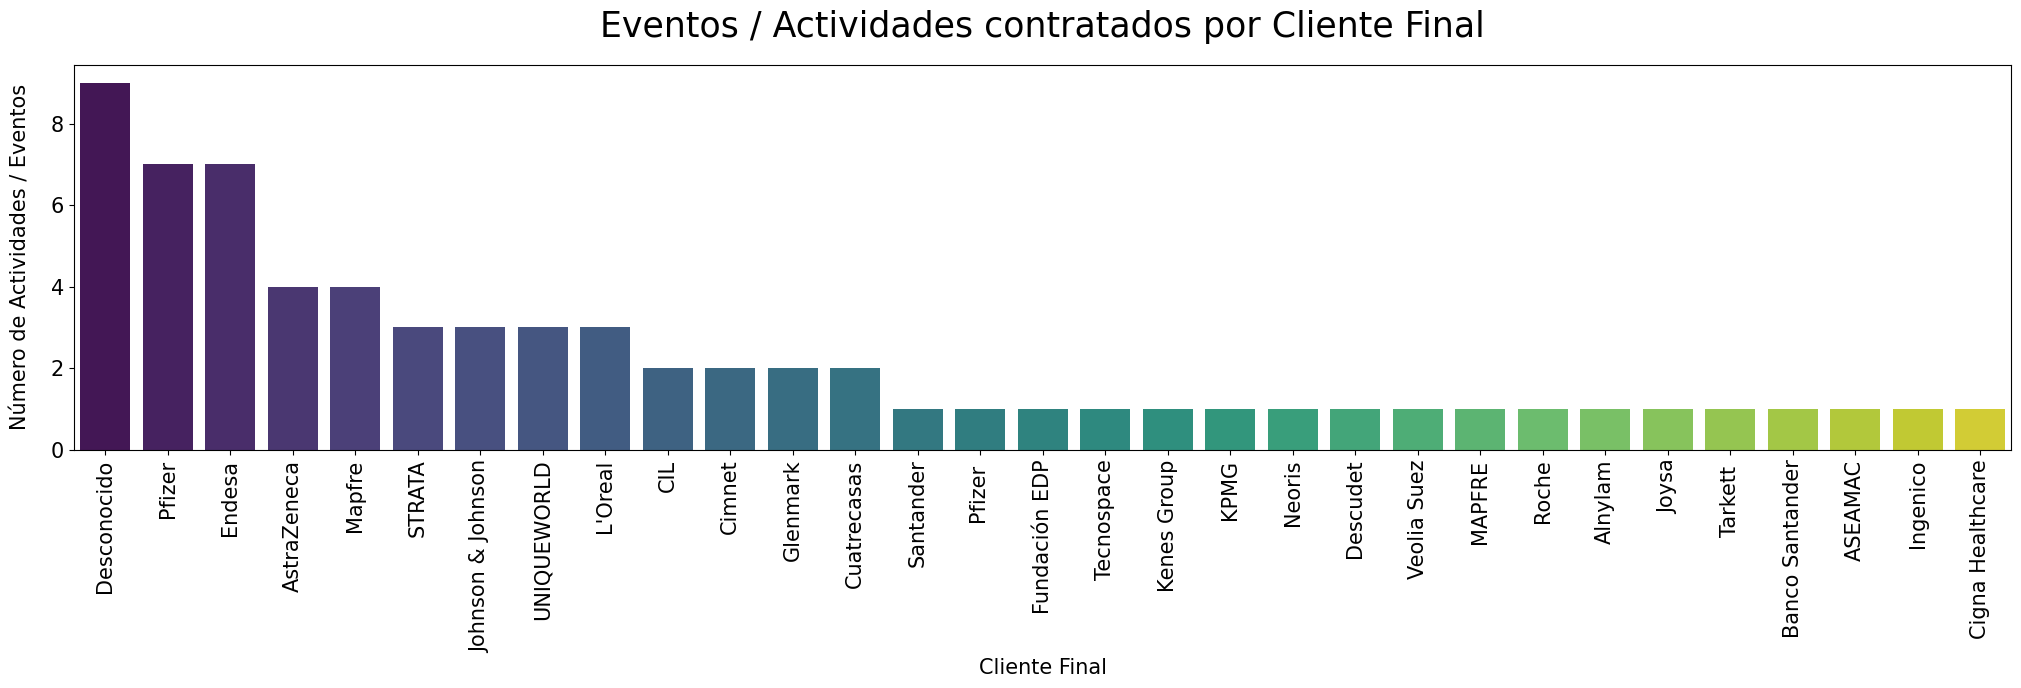

In [710]:
# Count occurrences and sort from highest to lowest
client_counts = data_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()

In [14]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
actividad_summary = data_servicios_vsp.groupby('tipo_actividad')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = actividad_summary.sort_values(by='margen', ascending=True)


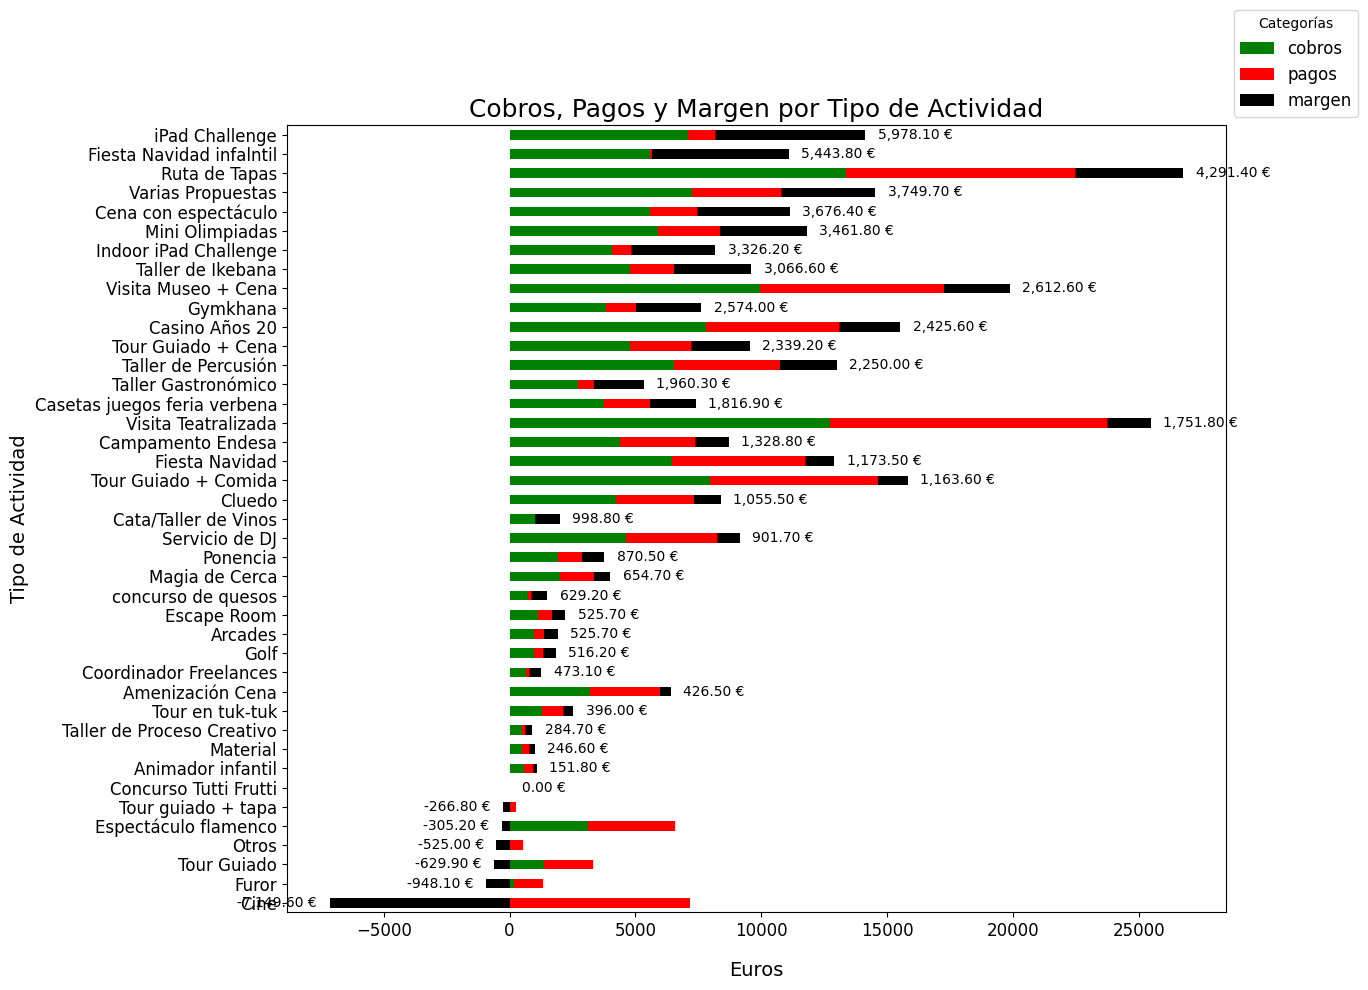

In [712]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
actividad_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Tipo de Actividad', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Tipo de Actividad', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


In [713]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_vsp.groupby('cliente_vsp')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
cliente_summary = cliente_summary.sort_values(by='margen', ascending=True)

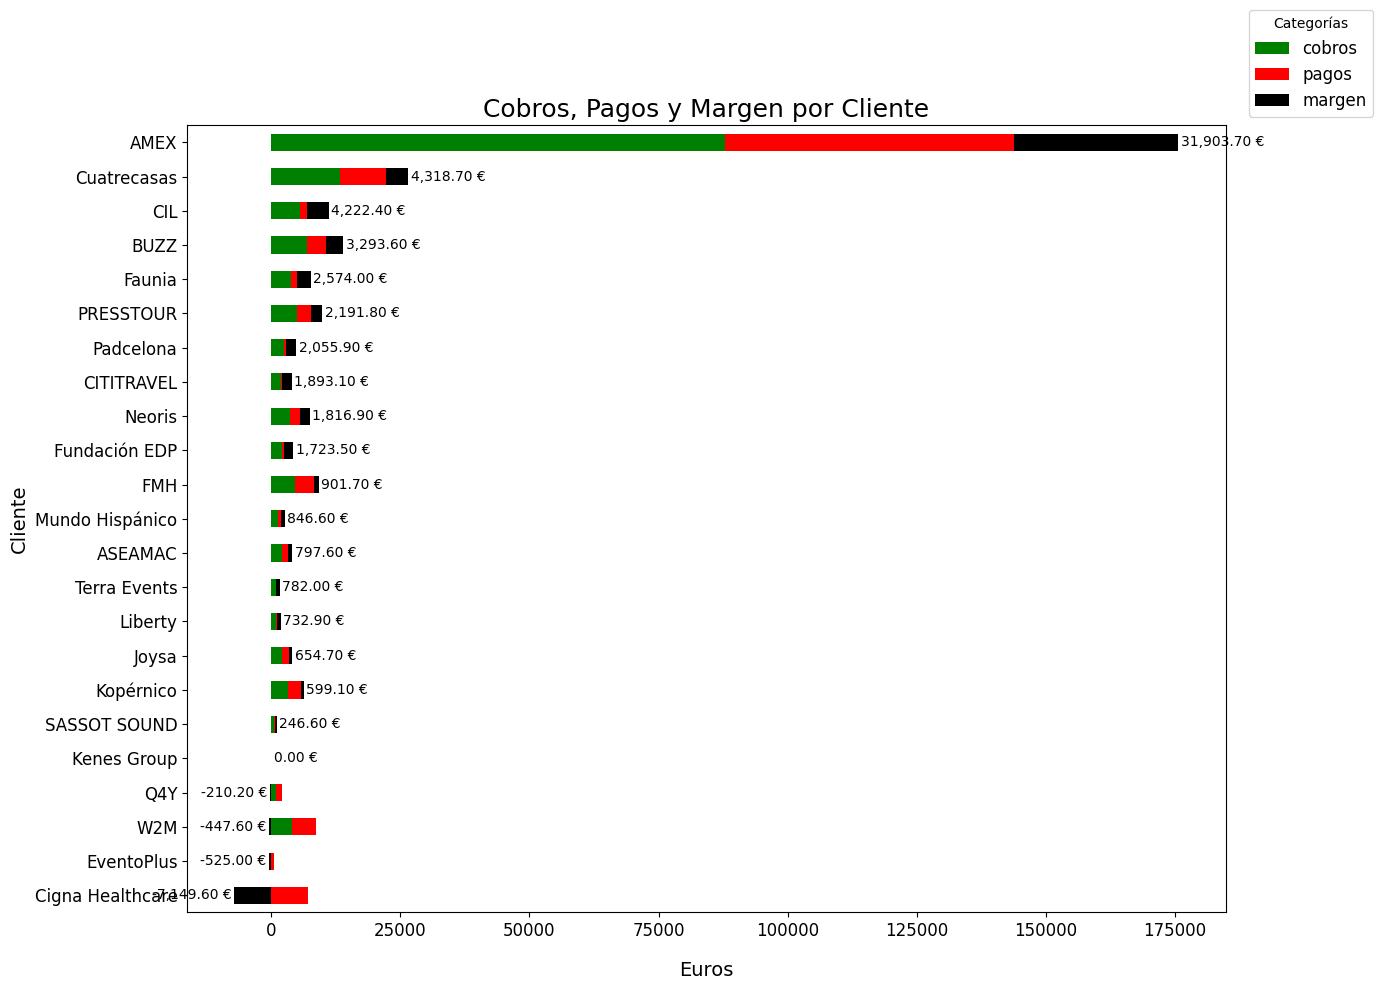

In [714]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
cliente_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Cliente', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Cliente', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


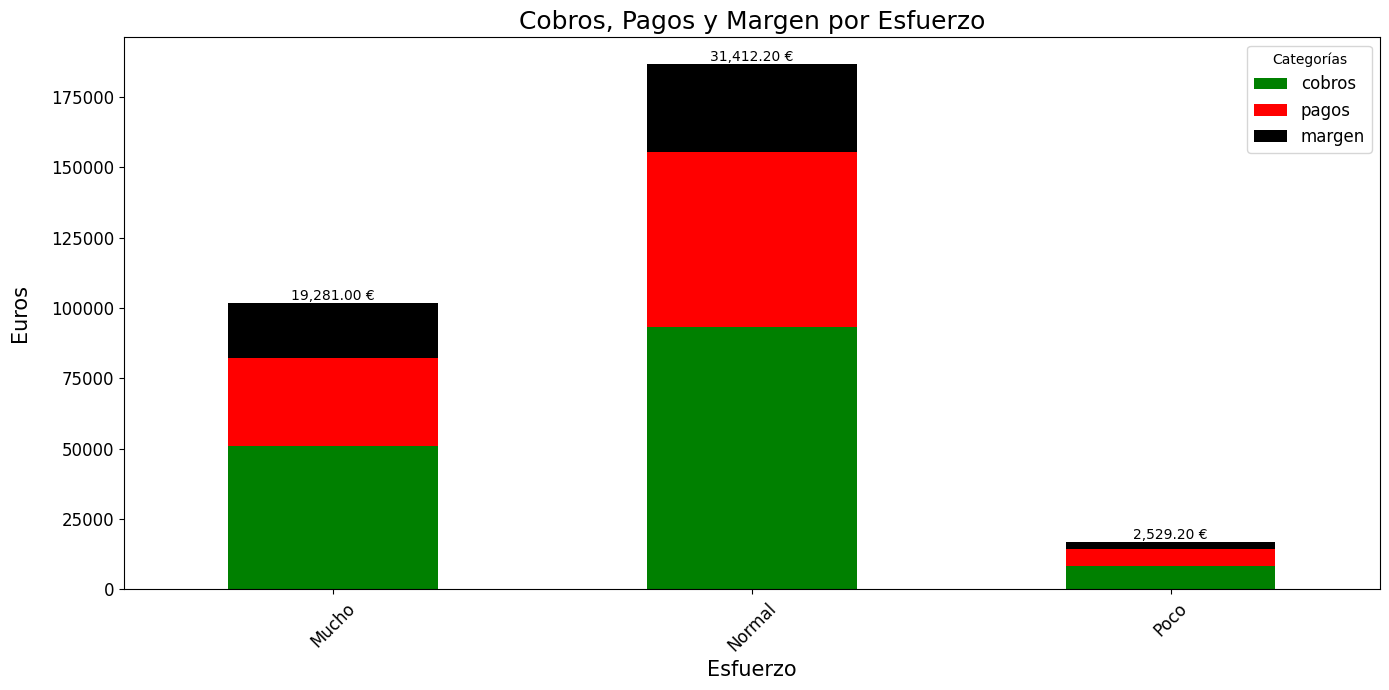

In [715]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_vsp.groupby('esfuerzo')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = cliente_summary.sort_values(by='margen', ascending=False)

# Crear el gráfico de barras apiladas
ax = cliente_summary.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red', 'black'])

# Mejorar la visualización
plt.xlabel('Esfuerzo', size=15)
plt.ylabel('Euros', size=15, labelpad=15)
plt.title('Cobros, Pagos y Margen por Esfuerzo', size=18)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

# Mover la leyenda a la esquina superior derecha
plt.legend(title='Categorías', loc='upper right', fontsize=12)

# Añadir anotaciones a las barras de margen
for p in ax.patches:
    # Obtener la altura de la barra (representa el valor acumulado)
    height = p.get_height()
    
    # Verificar si la barra corresponde al margen (color negro)
    if p.get_facecolor() == (0, 0, 0, 1):  # Color negro en formato RGBA
        # Obtener la posición X de la barra (es la misma para todas las barras apiladas)
        x = p.get_x() + p.get_width() / 2
        
        # Colocar la anotación encima de la barra de margen
        ax.text(x, p.get_y() + height + 10, f'{height:,.2f} €', ha='center', va='bottom', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Tiempo desde contacto a Evento

In [716]:
# Calcular la diferencia en días entre 'fecha_evento' y 'fecha_contacto'
data_vsp['dias_hasta_evento'] = (data_vsp['fecha_evento'] - data_vsp['fecha_contacto']).dt.days

In [717]:
# Filtrar las filas donde la fecha de contacto es posterior a la fecha de evento
eventos_incorrectos = data_vsp[data_vsp['fecha_contacto'] > data_vsp['fecha_evento']]

# Ver las filas con fecha de contacto posterior a la fecha del evento
eventos_incorrectos


,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano


In [718]:
data_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano
22,Visita Museo + Cena,2024-01-10,AMEX,Pfizer,100% pagado,19:00:00,23:30:00,2023-12-15,Madrid,ES,...,175.8,12306.7,NaN,2143,9931.3,6929.3,3002.1,Mucho,26.0,2024-01
26,Material,2024-01-16,SASSOT SOUND,Desconocido,100% pagado,NaT,NaT,2024-01-12,Madrid,EN,...,NaN,NaN,NaN,148,500.9,254.4,246.6,Normal,4.0,2024-01
27,Indoor iPad Challenge,2024-01-19,AMEX,AstraZeneca,100% pagado,11:30:00,13:30:00,2023-12-20,Toledo,ES,...,61.8,1175.0,NaN,1175,1123.2,300.1,823.1,Mucho,30.0,2024-01
30,Arcades,2024-01-24,Q4Y,Ingenico,100% pagado,18:30:00,21:00:00,2023-12-05,Madrid,EN,...,6.7,1000.0,NaN,550,955.9,430.2,525.7,Normal,50.0,2024-01
33,Amenización Cena,2024-01-30,ASEAMAC,ASEAMAC,100% pagado,20:30:00,22:30:00,2023-11-17,Madrid,ES,...,0.0,NaN,NaN,650,2028.6,1231.0,797.6,Normal,74.0,2024-01


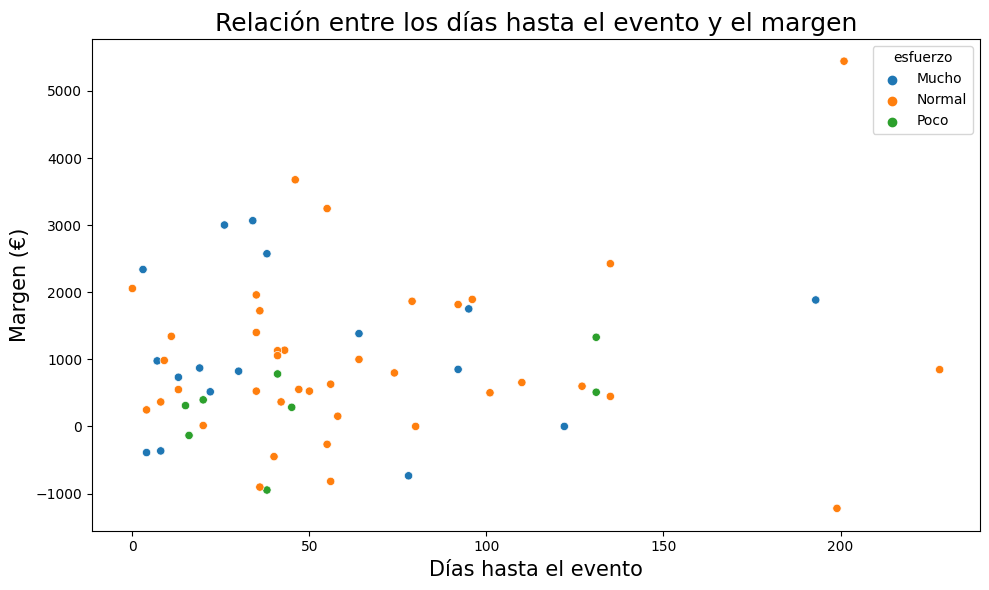

In [719]:
# Crear un gráfico de dispersión para analizar la relación entre los días hasta el evento y el margen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_vsp, x='dias_hasta_evento', y='margen', color='blue', hue = "esfuerzo")

# Mejorar la visualización
plt.xlabel('Días hasta el evento', size=15)
plt.ylabel('Margen (€)', size=15)
plt.title('Relación entre los días hasta el evento y el margen', size=18)
plt.tight_layout()
plt.show()


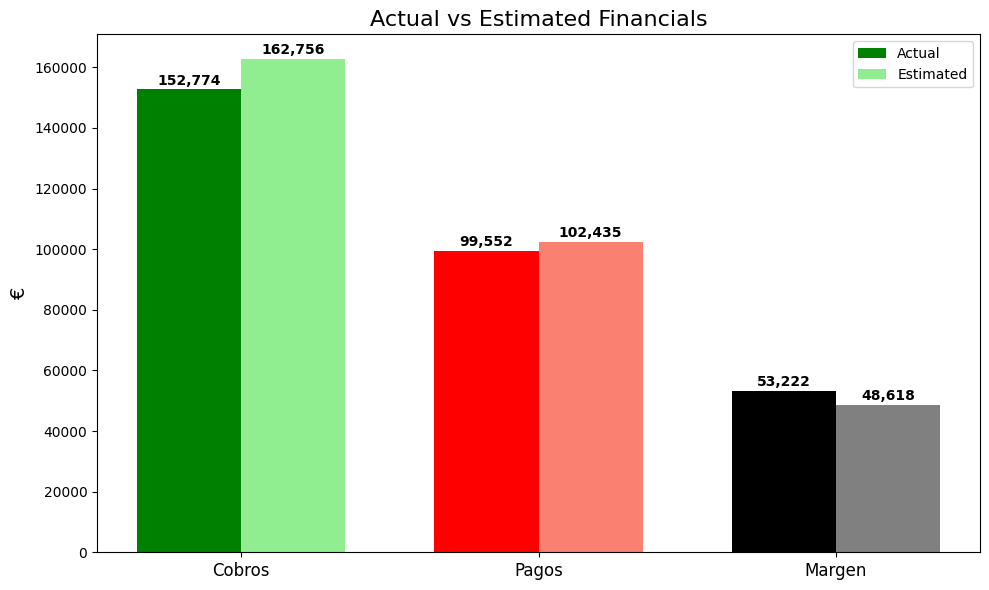

In [721]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['Cobros', 'Pagos', 'Margen']

# Get actual and estimated values
actual_values = [
    data_vsp['cobros'].sum(),
    data_vsp['pagos'].sum(),
    data_vsp['margen'].sum()
]

estimated_values = [
    data_vsp['ingreso_est_eur'].sum(),
    data_vsp['gasto_est_eur'].sum(),
    data_vsp['margen_est_eur'].sum()
]

# Define bar positions
x = np.arange(len(categories))
width = 0.35  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, actual_values, width, label='Actual', color=['green', 'red', 'black'])
bars2 = ax.bar(x + width/2, estimated_values, width, label='Estimated', color=['lightgreen', 'salmon', 'gray'])

# Labels and title
ax.set_ylabel('€', fontsize=14)
ax.set_title('Actual vs Estimated Financials', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()

# Add annotations on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()


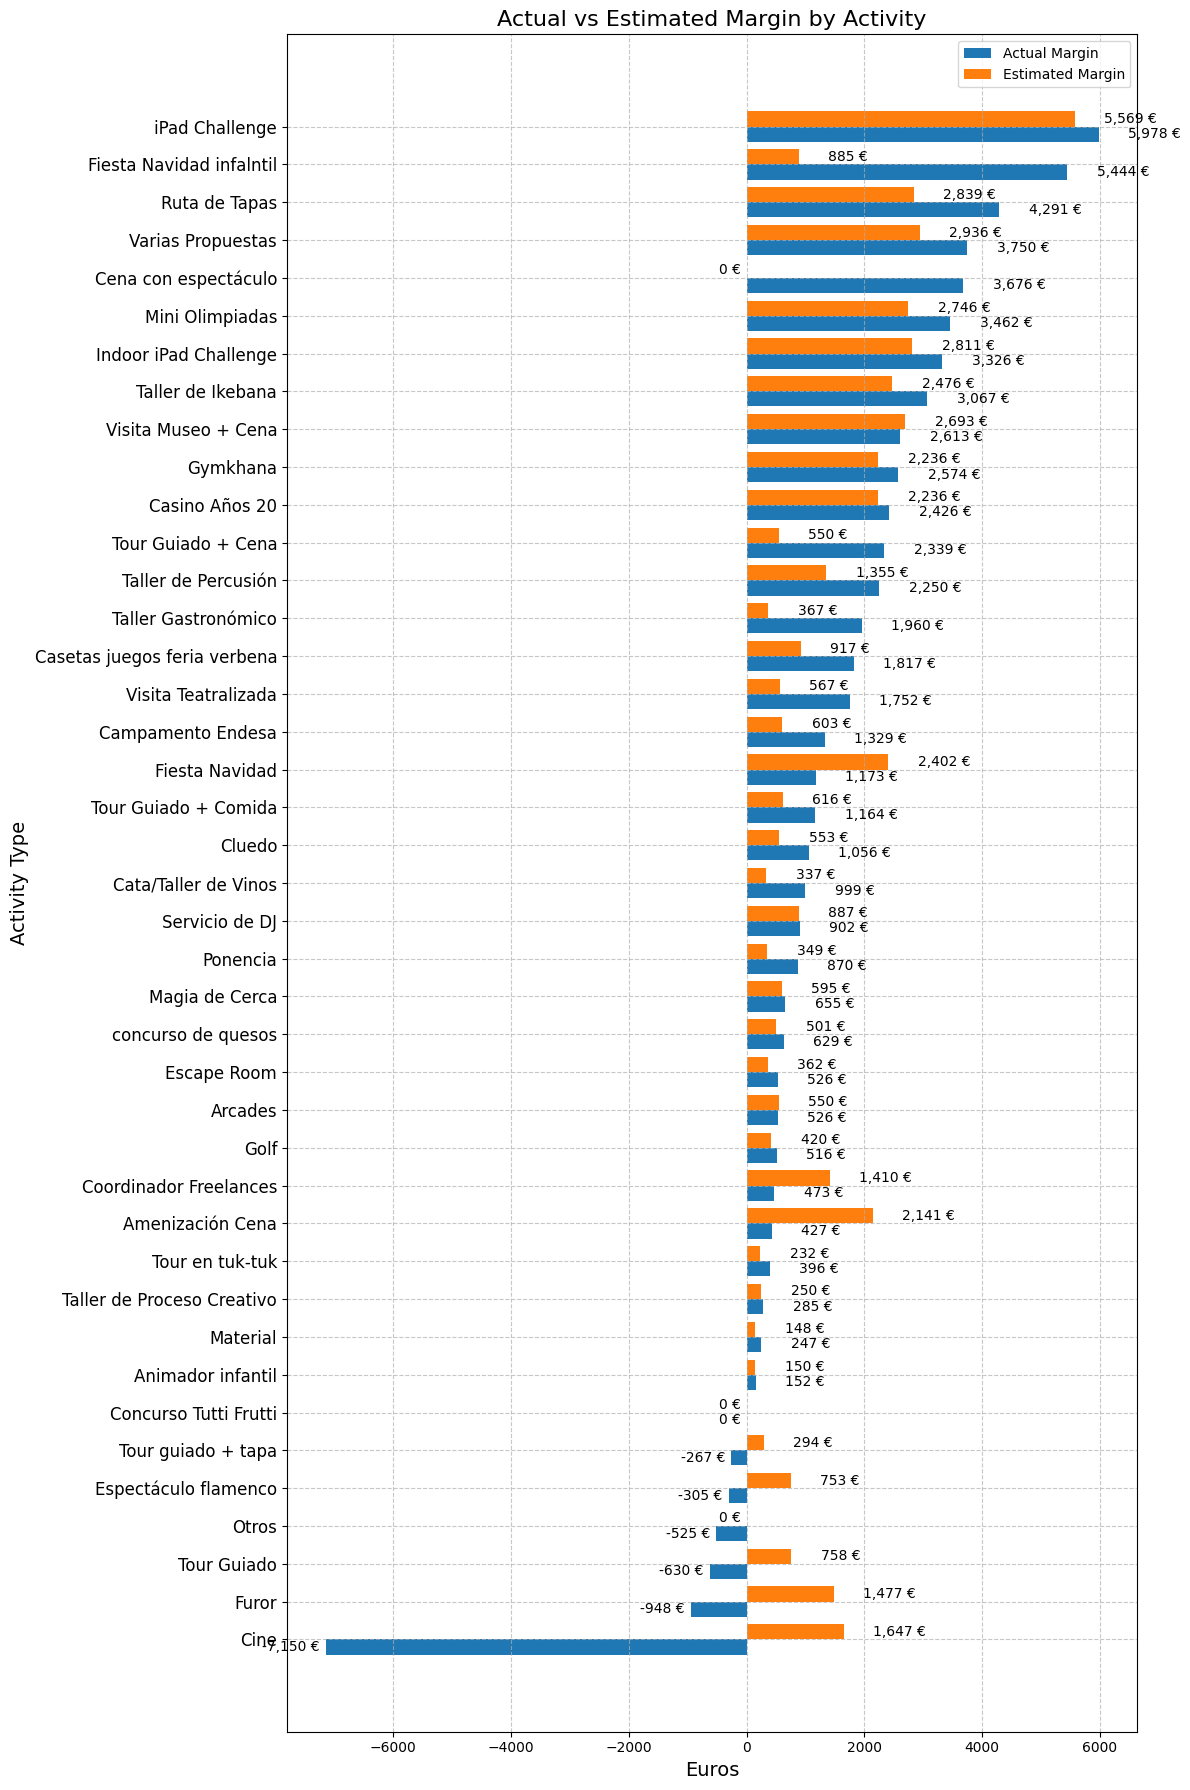

In [757]:
import matplotlib.pyplot as plt
import numpy as np

# Group by activity and sum margins
actividad_summary = data_vsp.groupby('tipo_actividad')[['margen', 'margen_est_eur']].sum()

# Sort by actual margin (ascending for horizontal bars)
actividad_summary = actividad_summary.sort_values(by='margen', ascending=True)

# Define custom positions with extra spacing
n = len(actividad_summary)
y_pos = np.arange(n) * 3  # Creates space between each activity group

# Define bar width
bar_width = 1.2  

# Create figure
fig, ax = plt.subplots(figsize=(12, 18))

# Plot bars (Actual vs Estimated)
bars1 = ax.barh(y_pos - bar_width/2, actividad_summary['margen'], bar_width, label='Actual Margin', color='#1f77b4')  # Blue
bars2 = ax.barh(y_pos + bar_width/2, actividad_summary['margen_est_eur'], bar_width, label='Estimated Margin', color='#ff7f0e')  # Orange

# Labels and title
ax.set_ylabel('Activity Type', fontsize=14)
ax.set_xlabel('Euros', fontsize=14)
ax.set_title('Actual vs Estimated Margin by Activity', fontsize=16)

# Set y-ticks with spacing
ax.set_yticks(y_pos)
ax.set_yticklabels(actividad_summary.index, fontsize=12)

# Add grid
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.grid(axis="y", linestyle="--", alpha=0.7)


# Add annotations on bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 500 if width > 0 else width - 100,  # Adjust position dynamically
                bar.get_y() + bar.get_height() / 2, 
                f'{width:,.0f} €', ha='left' if width > 0 else 'right', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.legend()
plt.show()
